# Ejercicio 1
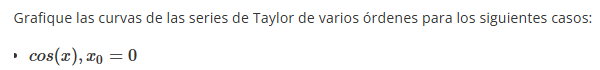

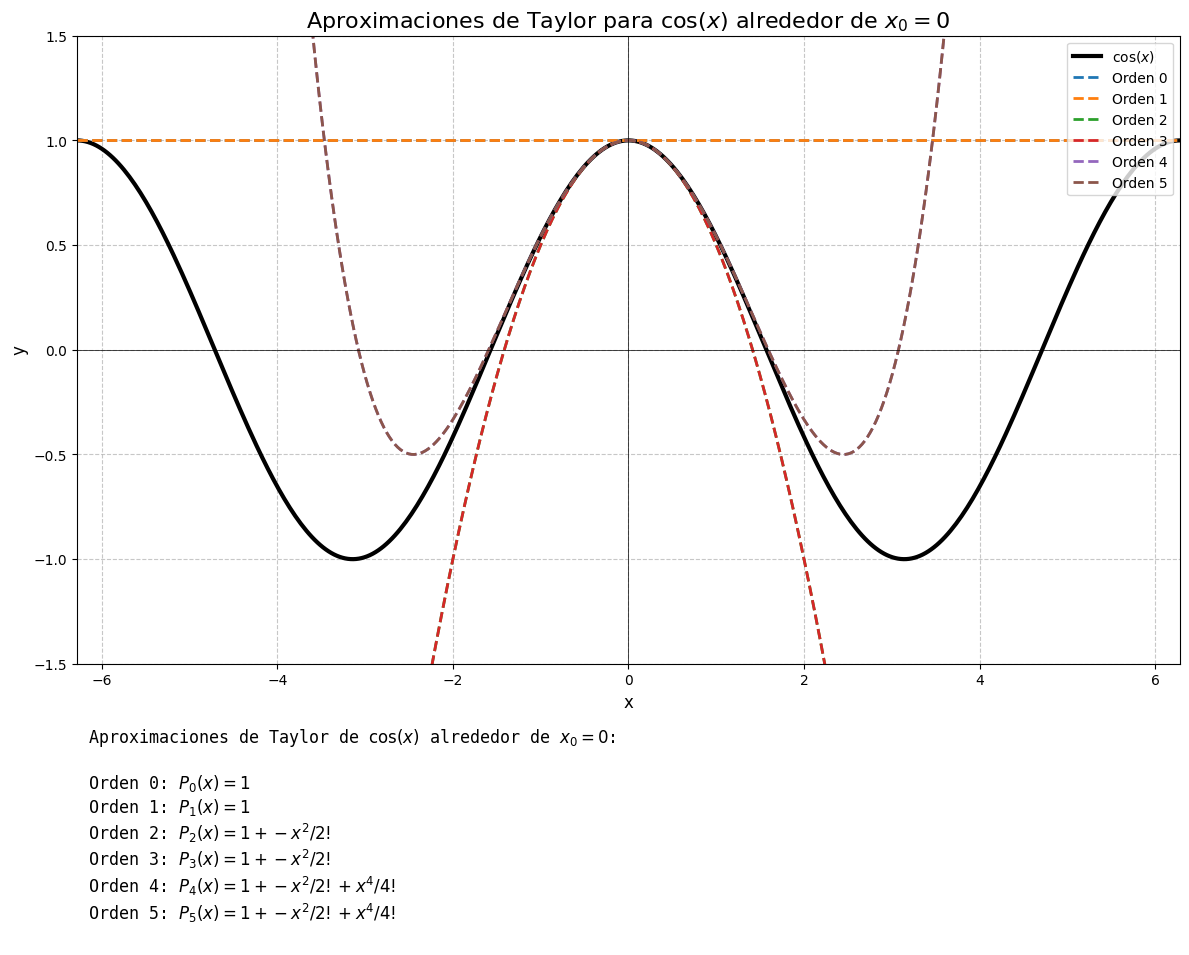

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# --------------------------
# Función original: cos(x)
# --------------------------
def cos_function(x):
    return np.cos(x)

# --------------------------
# Aproximación de Taylor para cos(x) centrada en 0
# --------------------------
def taylor_cos(x, order):
    result = 0
    for n in range(0, order + 1, 2):  # Solo términos pares
        sign = (-1) ** (n // 2)
        result += sign * x ** n / math.factorial(n)
    return result

# --------------------------
# Generador de ecuación como texto
# --------------------------
def get_cos_taylor_equation(order):
    terms = []
    for n in range(0, order + 1, 2):
        sign = "-" if (n // 2) % 2 == 1 else ""
        if n == 0:
            terms.append("1")
        else:
            terms.append(f"{sign}x^{n}/{n}!")
    return " + ".join(terms).replace("+-", "- ")

# --------------------------
# Rango de valores y órdenes
# --------------------------
x = np.linspace(-2 * np.pi, 2 * np.pi, 400)
orders = [0, 1, 2, 3, 4, 5]  # De orden 0 a 5

# --------------------------
# Crear figura con 2 subplots
# --------------------------
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [3, 1]})

# --------------------------
# Parte 1: Gráfico
# --------------------------
ax1.set_title('Aproximaciones de Taylor para $\\cos(x)$ alrededor de $x_0 = 0$', fontsize=16)
ax1.plot(x, cos_function(x), 'k', linewidth=3, label='$\\cos(x)$')

# Añadir aproximaciones de Taylor
for order in orders:
    y = np.array([taylor_cos(xi, order) for xi in x])
    ax1.plot(x, y, '--', linewidth=2, label=f'Orden {order}')

# Decoración del gráfico
ax1.axhline(0, color='black', linewidth=0.5)
ax1.axvline(0, color='black', linewidth=0.5)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(loc='upper right', fontsize=10)
ax1.set_xlim(-2 * np.pi, 2 * np.pi)
ax1.set_ylim(-1.5, 1.5)

# --------------------------
# Parte 2: Ecuaciones
# --------------------------
ax2.axis('off')  # Ocultar ejes

# Mostrar ecuaciones como texto
equation_text = "Aproximaciones de Taylor de $\\cos(x)$ alrededor de $x_0 = 0$:\n\n"
for order in orders:
    equation = get_cos_taylor_equation(order)
    equation_text += f"Orden {order}: $P_{{{order}}}(x) = {equation}$\n"

ax2.text(0.01, 1, equation_text, fontsize=12, va='top', ha='left', family='monospace')

# Ajustar diseño
plt.tight_layout()
plt.show()
